In [1]:
!pip install numpy pandas seaborn matplotlib imbalanced-learn scikit-learn

In [2]:
!pip install -U imbalanced-learn

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, IsolationForest

Data taken from https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

# Data set glossary (by column)
**Patient ID** - Unique identifier for each patient  
**Age** - Patient's age  
**Sex** - Patient's gender  (Male/Female)  
**Cholesterol** - The patient's cholesterol levelа  
**Blood Pressure** - Patient's blood pressure (systolic/diastolic)  
**Heart Rate** - The patient's heart rate  
**Diabetes** - Whether the patient has diabetes (Yes/No)  
**Family History** - Family history of heart-related problems (1: Yes, 0: No)  
**Smoking** - patient's smoking status (1: Smoker, 0: Non-smoker)  
**Obesity** - patient's degree of obesity (1: Obese, 0: Not obese)  
**Alcohol Consumption** - Patient's level of alcohol consumption (None/Light/Moderate/Heavy)  
**Exercise Hours Per Week** - Number of hours of physical exercise per week  
**Diet** - Dietary habits of the patient (Healthy/Average/Unhealthy)  
**Previous Heart Problems** - Previous heart problems in the patient (1: Yes, 0: No)  
**Medication Use** - Patient's use of medication (1: Yes, 0: No)  
**Stress Level** - The level of stress reported by the patient (1-10)  
**Sedentary Hours Per Day** - Hours of sedentary work per day  
**Income** - The patient's income level  
**BMI** - Body Mass Index (BMI) of the patient  
**Triglycerides** - patient's triglyceride level  
**Physical Activity Days Per Week** - Days of physical activity per week  
**Sleep Hours Per Day** - Number of hours of sleep per day  
**Country** - Country of residence of the patient  
**Continent** - The continent where the patient lives  
**Hemisphere** - The hemisphere in which the patient resides  
**Heart Attack Risk** - Presence of risk of heart attack (1: Yes, 0: No)  

In [6]:
# Replace with your data path heart_attack_prediction_dataset.csv
path_file = "data/heart_attack_prediction_dataset.csv"

In [7]:
data = pd.read_csv(path_file)

# EDA & Preparing the dataset

In [8]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


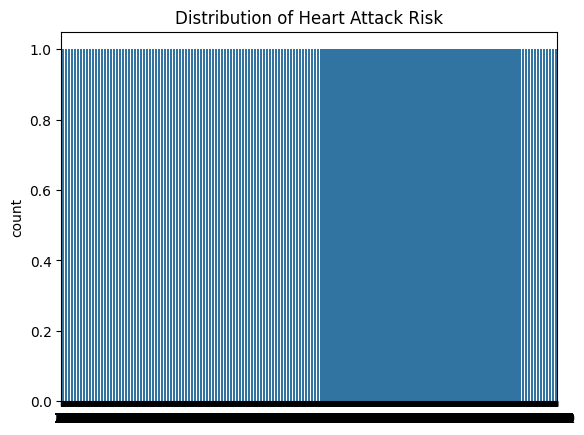

In [10]:
# Distribution of the target variable (Heart Attack Risk)
sns.countplot(data['Heart Attack Risk'])
plt.title('Distribution of Heart Attack Risk')
plt.show()

Based on the obtained diagram we can see that the data are not balanced

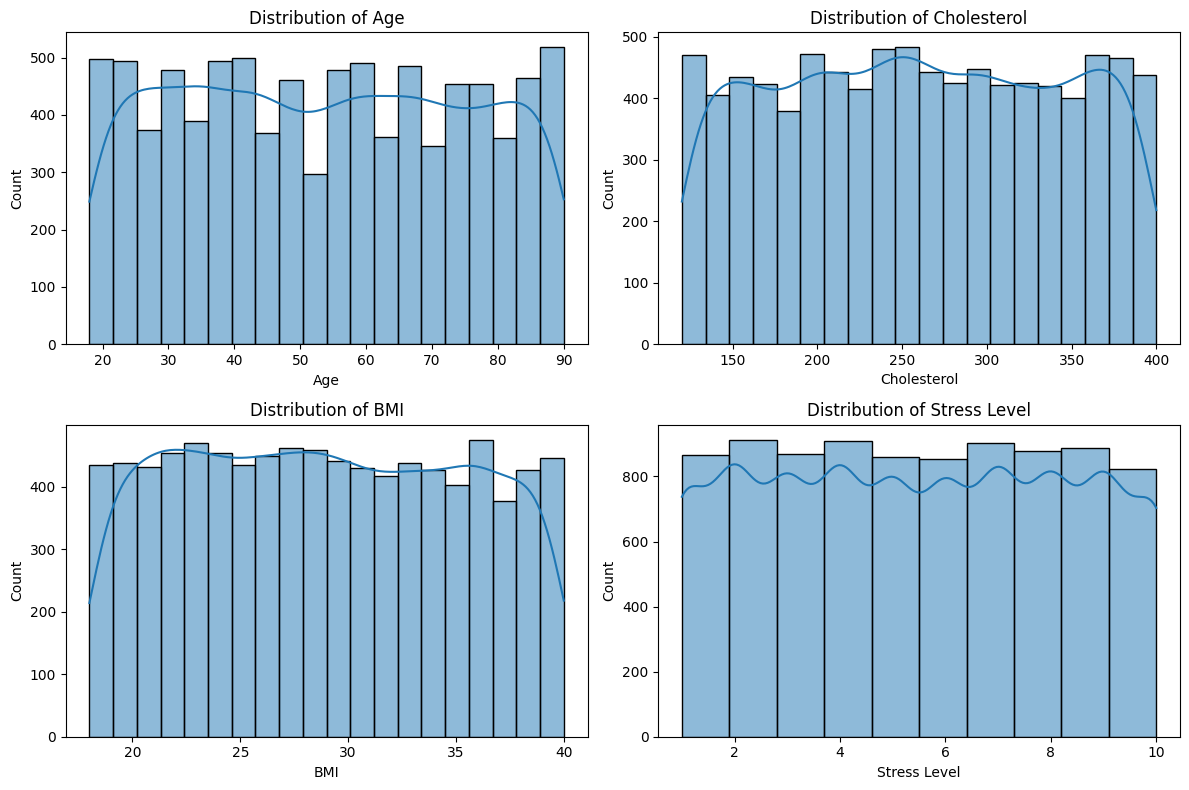

In [11]:
plt.figure(figsize=(12, 8))

#  Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution by cholesterol
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Cholesterol', bins=20, kde=True)
plt.title('Distribution of Cholesterol')

# BMI distribution
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='BMI', bins=20, kde=True)
plt.title('Distribution of BMI')

# Distribution by stress level
plt.subplot(2, 2, 4)
sns.histplot(data=data, x='Stress Level', bins=10, kde=True)
plt.title('Distribution of Stress Level')

plt.tight_layout()
plt.show()

### Analysing key statistical indicators:
**Age**: The mean age of patients is about 53-54 years, with a minimum of 18 years and a maximum of 90 years.  
**Cholesterol**: The mean cholesterol level is about 260 mg/dl, with a minimum value of 120 and a maximum of 400.  
**Pulse**: Average heart rate is about 75 beats per minute, with a minimum of 40 and a maximum of 110.  
**Diabetes**: Approximately 65% of patients have diabetes.  
**Smoking and Obesity**: Almost 90% of patients smoke and 50% have signs of obesity.  
**Stress Level**: The average stress level is about 5.5 on a scale of 1 to 10.  
**Sitting Lifestyle**: Average hours of sedentary lifestyle is about 6 hours per day.  
**Physical activity**: On average, patients exercise about 3-4 times per week.  
**Risk of heart attack**: About 36% of patients have a high risk of heart attack.  

**Conclusion**: Overall, the data show diversity in age, cholesterol, body mass index, and stress levels. The distributions of the traits have some degree of diversity but do not contain highly abnormal values, suggesting relative normality.

Let's do the data conversion and cleansing

In [12]:
data = data.drop(["Patient ID"], axis=1)
data = data.rename(columns=lambda col: col.replace(" ", "_").lower())
data[["systolic", "diastolic"]] = data["blood_pressure"].str.split("/", expand=True)
data = data.drop(["blood_pressure"], axis=1)

columns_to_encode = list(data.select_dtypes(include=['object']).columns)

label_encoder = LabelEncoder()
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

In [13]:
pd.set_option('display.max_columns', None)
data

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic,diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,0,9,6.615001,261404,31.251233,286,0,6,0,5,1,0,58,39
1,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,285768,27.194973,235,1,7,3,4,0,0,65,44
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,1,9,9.463426,235282,28.176571,587,4,4,6,3,0,0,74,50
3,84,1,383,73,1,1,1,0,1,9.828130,0,1,0,9,7.648981,125640,36.464704,378,3,4,3,4,0,0,63,0
4,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,160555,21.809144,231,1,5,16,1,0,0,82,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,1,1,1,8,10.806373,235420,19.655895,67,7,7,16,1,0,0,85,27
8759,28,0,120,73,1,0,0,1,0,16.558426,1,0,0,8,3.833038,217881,23.993866,617,4,9,3,4,0,0,57,2
8760,47,1,250,105,0,1,1,1,1,3.148438,0,1,0,5,2.375214,36998,35.406146,527,4,4,2,5,1,1,61,26
8761,36,1,178,60,1,0,1,0,0,3.789950,2,1,1,5,0.029104,209943,27.294020,114,2,8,2,5,1,0,19,18


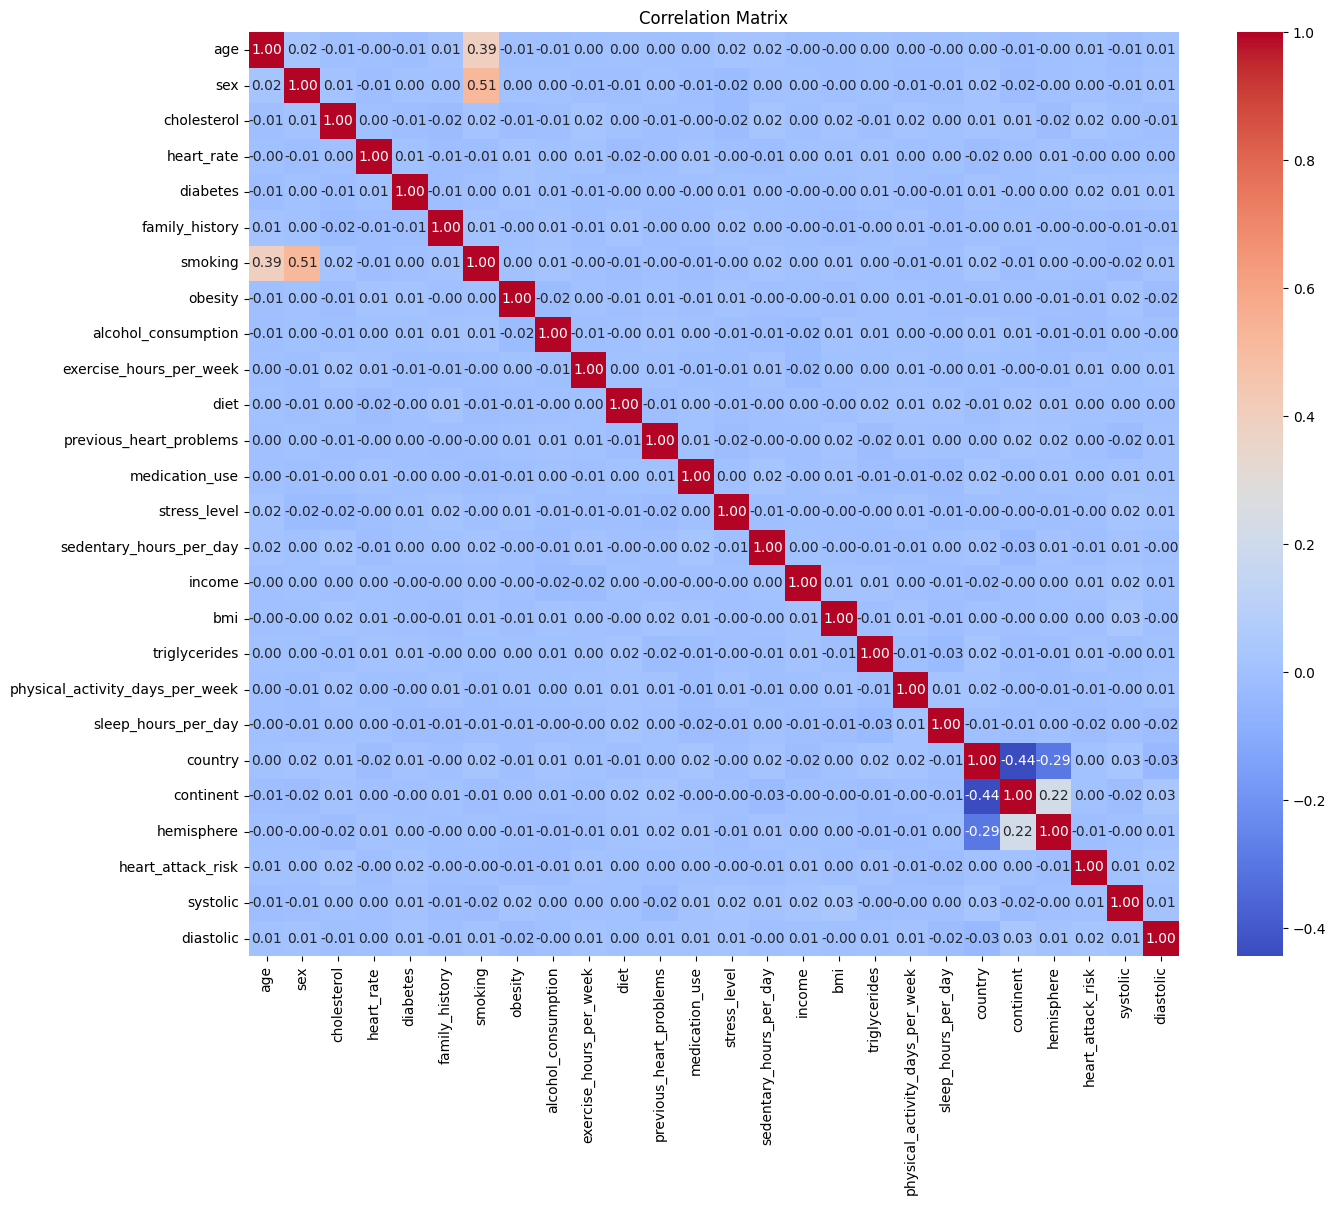

In [14]:
# Correlation matrix of numerical features
corr_matrix = data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Several conclusions can be drawn from the presented correlation matrix:
**Strong correlation**:  

*smoking* has a strong positive correlation with *age*.  
*smoking* also has some positive correlation with *heart_attack_risk*.  

**Weak correlation**:  

*age* and *sex* have a very weak correlation.  
*diabetes* and *income* also show low correlation.  

**No correlation**:  

Some pairs of traits have a correlation value close to zero, indicating that there is no linear relationship between them.

In [15]:
corr_matrix = data.corr()

# Finding the features with the highest correlation (positive and negative) with the target feature "Heart Attack Risk"
target_corr = corr_matrix['heart_attack_risk'].drop('heart_attack_risk')  
top_pos_corr_features = target_corr[target_corr > 0].nlargest(6).index  
top_neg_corr_features = target_corr[target_corr < 0].nsmallest(6).index  

print("Top Positive Correlation Features:")
print(top_pos_corr_features)

print("\nTop Negative Correlation Features:")
print(top_neg_corr_features)

# Combining lists of features with the highest positive and negative correlation
combined_features = top_pos_corr_features.union(top_neg_corr_features)

print("Combined Features with Highest Correlation:")
print(combined_features)

Top Positive Correlation Features:
Index(['diastolic', 'cholesterol', 'diabetes', 'exercise_hours_per_week',
       'triglycerides', 'income'],
      dtype='object')

Top Negative Correlation Features:
Index(['sleep_hours_per_day', 'alcohol_consumption', 'obesity', 'hemisphere',
       'sedentary_hours_per_day', 'physical_activity_days_per_week'],
      dtype='object')
Combined Features with Highest Correlation:
Index(['alcohol_consumption', 'cholesterol', 'diabetes', 'diastolic',
       'exercise_hours_per_week', 'hemisphere', 'income', 'obesity',
       'physical_activity_days_per_week', 'sedentary_hours_per_day',
       'sleep_hours_per_day', 'triglycerides'],
      dtype='object')


<Figure size 1800x1200 with 0 Axes>

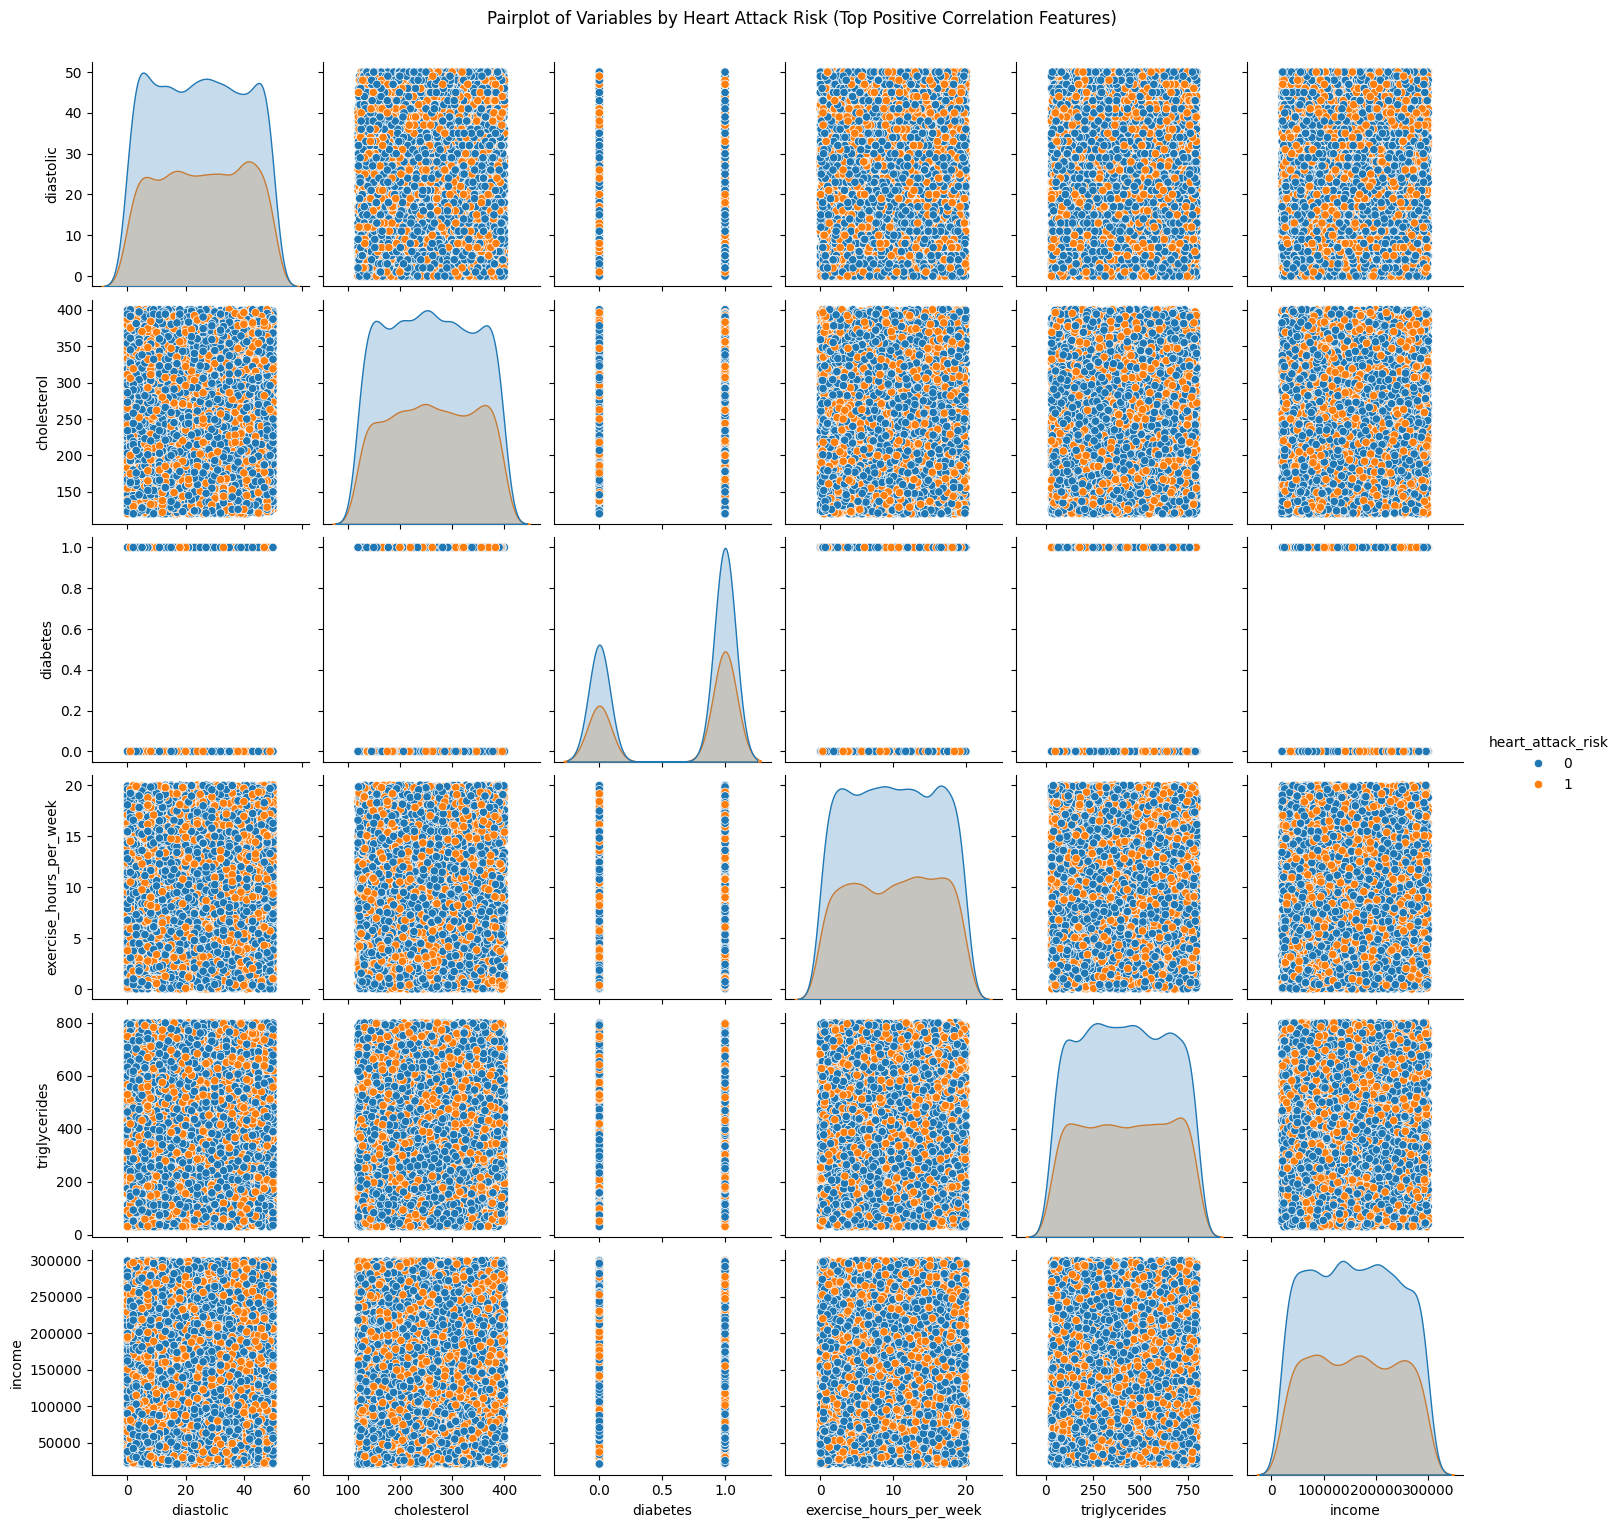

In [16]:
# Re-create pairplot after data conversion
plt.figure(figsize=(18, 12))
sns.pairplot(data, vars=top_pos_corr_features, hue='heart_attack_risk')
plt.suptitle('Pairplot of Variables by Heart Attack Risk (Top Positive Correlation Features)', y=1.02)
plt.show()

<Figure size 1800x1200 with 0 Axes>

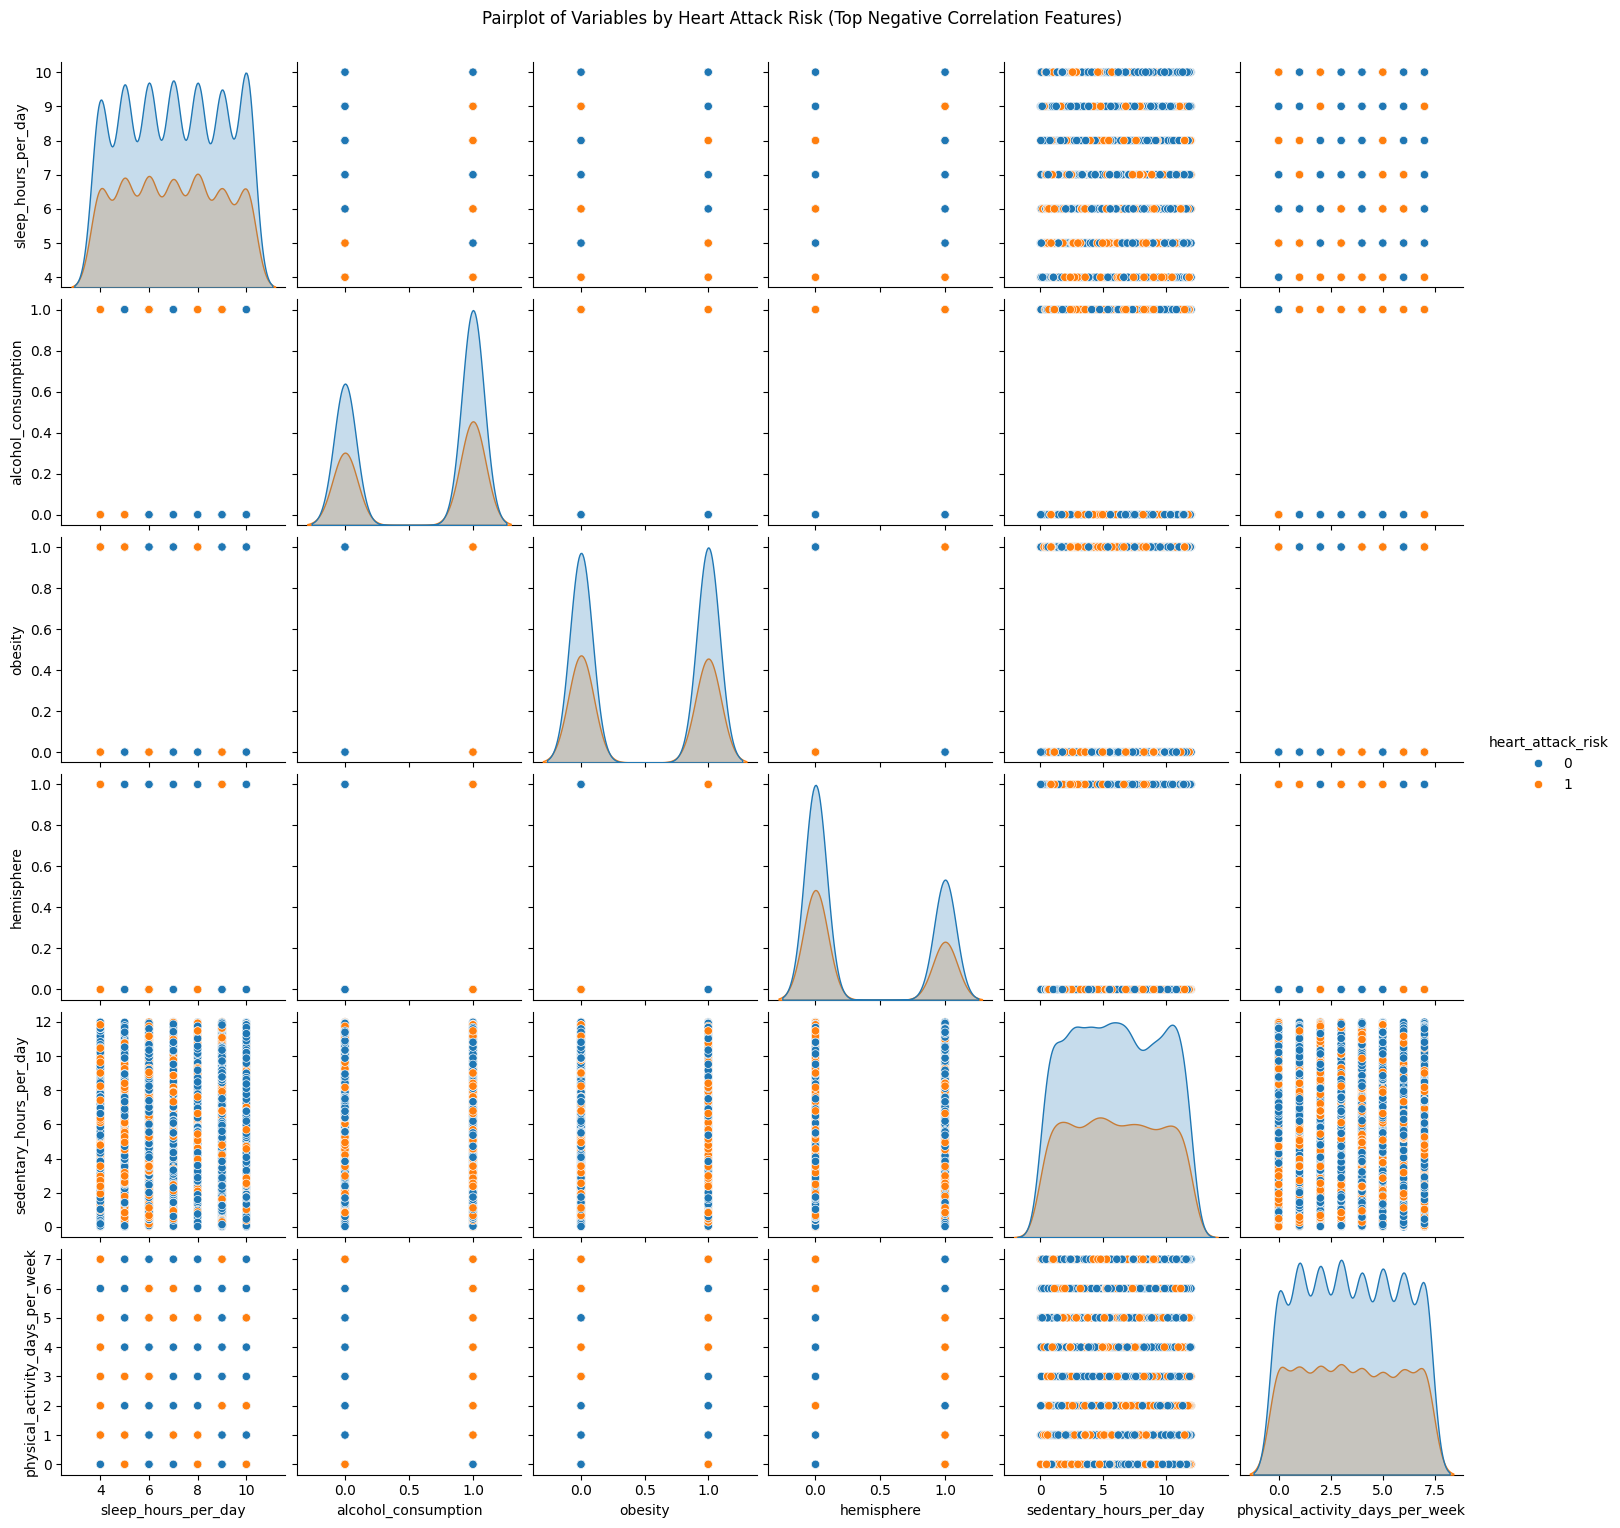

In [17]:
# Re-create pairplot after data conversion
plt.figure(figsize=(18, 12))
sns.pairplot(data, vars=top_neg_corr_features, hue='heart_attack_risk')
plt.suptitle('Pairplot of Variables by Heart Attack Risk (Top Negative Correlation Features)', y=1.02)
plt.show()

# Model

In [18]:
# Creating a subset of data based on selected attributes
df = data.copy()
df.head()

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic,diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,0,9,6.615001,261404,31.251233,286,0,6,0,5,1,0,58,39
1,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,285768,27.194973,235,1,7,3,4,0,0,65,44
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,1,9,9.463426,235282,28.176571,587,4,4,6,3,0,0,74,50
3,84,1,383,73,1,1,1,0,1,9.828130,0,1,0,9,7.648981,125640,36.464704,378,3,4,3,4,0,0,63,0
4,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,160555,21.809144,231,1,5,16,1,0,0,82,39


In [19]:
def preprocess_data(df, target_column, test_size=0.4, val_size=0.5, random_state=1, contamination=0.1):
    """
    Preprocesses the input data by performing data cleaning, splitting it into training,
    validation, and test sets, scaling features, and balancing classes using SMOTE.
    """
    
    # Creating an Isolation Forest model
    iso_forest = IsolationForest(contamination=contamination)  # Indication of contamination level
    iso_forest.fit(df)  

    # Obtaining predictions to identify anomalous points (outliers)
    outlier_labels = iso_forest.predict(df)

    # Creating a new DataFrame without anomalous points
    cleaned_df = df[outlier_labels == 1]  # 1 indicates no anomaly

    X = cleaned_df.drop(columns=[target_column])
    y = cleaned_df[target_column]
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=random_state)

    # Saving column names
    columns = X_train.columns

    # Creating a StandardScaler object
    sc = StandardScaler()

    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=columns)
    X_val = pd.DataFrame(sc.transform(X_val), columns=columns)

    print("Train set shape:", X_train.shape, y_train.shape)
    print("Validation set shape:", X_val.shape, y_val.shape)
    print("Test set shape:", X_test.shape, y_test.shape)
    
    # Balancing classes using SMOTE (oversampling the minority class)
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
X_train, X_val, X_test, y_train, y_val, y_test = preprocess_data(df, "heart_attack_risk")

Train set shape: (4731, 25) (4731,)
Validation set shape: (1577, 25) (1577,)
Test set shape: (1578, 25) (1578,)


In [21]:
def train_model(model, X, y, parameters):
    """
    Trains the given model using Randomized Search Cross Validation 
    and sets it with the best parameters found.
    """
    random_search = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_iter=50, cv=10, scoring="roc_auc", n_jobs=-1)
    random_search.fit(X, y)
    best_accuracy = random_search.best_score_
    best_parameters = random_search.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    model.set_params(**best_parameters)
    model.fit(X, y)
    return model


def retrain_with_errors(model, X_train, y_train, X_val, y_val):
    """
    Retrains the model by adding previously misclassified 
    samples from the validation set to the training set.
    """
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    incorrect_indices = np.where(y_pred_val != y_val)[0]
    X_train_with_errors = pd.concat([X_train, X_val.iloc[incorrect_indices]])
    y_train_with_errors = pd.concat([y_train, y_val.iloc[incorrect_indices]])
    return X_train_with_errors, y_train_with_errors


def evaluate_model(model, X, y, dataset_name):
    """
    Evaluates the trained model on a given dataset.
    """
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    ac = accuracy_score(y, y_pred)
    cr = classification_report(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred_proba)

    print(f"{dataset_name} Evaluation")
    print(f"Accuracy on {dataset_name}: {ac}")
    print("Classification Report:")
    print(cr)
    print(f"ROC AUC on {dataset_name}: {roc_auc}")
    print("Confusion Matrix:")
    print(cm)

### GradientBoostingClassifier

In [19]:
# Create GradientBoostingClassifier and set its parameters
gb_model = GradientBoostingClassifier(random_state=1)
gb_parameters = {
    "n_estimators": [500, 600, 700],
    "learning_rate": [0.01, 0.2, 0.4],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

best_gb_model = train_model(gb_model, X_train, y_train, gb_parameters)

# Evaluate on the validation set
evaluate_model(best_gb_model, X_val, y_val, "Validation Set")

# Retrain with errors
X_train_with_errors, y_train_with_errors = retrain_with_errors(best_gb_model, X_train, y_train, X_val, y_val)
best_gb_model.fit(X_train_with_errors, y_train_with_errors)

# Evaluate on the test set after retraining
evaluate_model(best_gb_model, X_test, y_test, "Test Set")

Best Accuracy: 83.21 %
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'learning_rate': 0.2}
Validation Set Evaluation
Accuracy on Validation Set: 0.6366518706404566
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      1066
           1       0.32      0.11      0.17       511

    accuracy                           0.64      1577
   macro avg       0.50      0.50      0.47      1577
weighted avg       0.56      0.64      0.57      1577

ROC AUC on Validation Set: 0.5035155289081116
Confusion Matrix:
[[947 119]
 [454  57]]
Test Set Evaluation
Accuracy on Test Set: 0.5975918884664132
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1058
           1       0.32      0.20      0.25       520

    accuracy                           0.60      1578
   macro avg       0.50      0.50      0

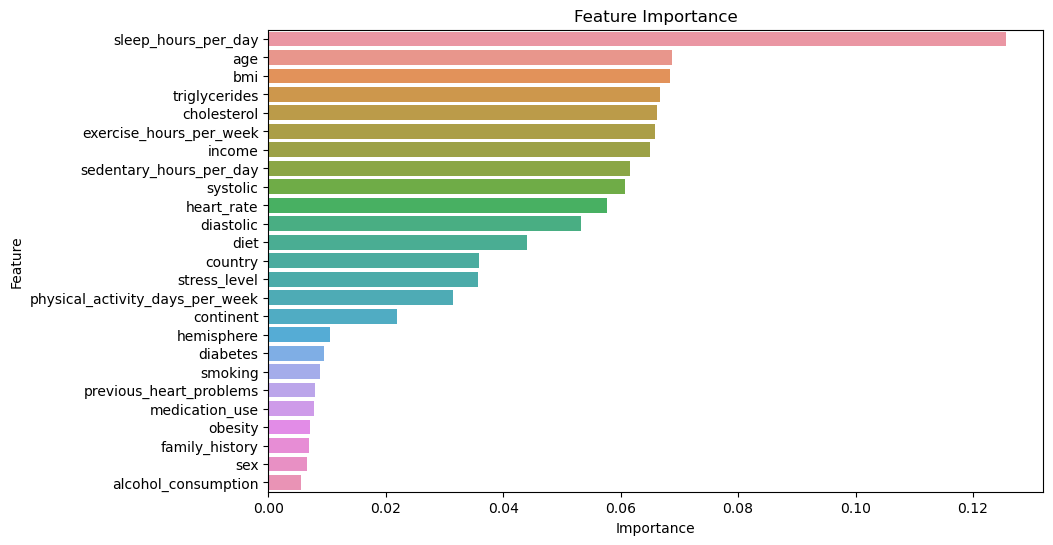

                            Feature  Importance
19              sleep_hours_per_day    0.125680
0                               age    0.068706
16                              bmi    0.068476
17                    triglycerides    0.066778
2                       cholesterol    0.066210
9           exercise_hours_per_week    0.065795
15                           income    0.065013
14          sedentary_hours_per_day    0.061564
23                         systolic    0.060792
3                        heart_rate    0.057732
24                        diastolic    0.053302
10                             diet    0.044094
20                          country    0.035807
13                     stress_level    0.035744
18  physical_activity_days_per_week    0.031412
21                        continent    0.021920
22                       hemisphere    0.010582
4                          diabetes    0.009543
6                           smoking    0.008836
11          previous_heart_problems    0

In [20]:
# Obtaining the importance of attributes
feature_importance_gb = best_gb_model.feature_importances_

# Creating a DataFrame to visualise the importance of attributes
feature_importance_df_gb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# Visualising the importance of attributes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Conclusion of the importance of attributes in descending order
print(feature_importance_df_gb)

Based on the feature importance analysis for the **GradientBoostingClassifier** model, the following conclusions can be drawn:  
1. Sleep (**sleep_hours_per_day**) was found to be the most important factor among those considered. This may indicate the impact of lack of or excessive sleep on a person's overall health.  
2. Age (**age**) and body mass index (**bmi**) also have a significant impact. These are typical health indicators associated with the risk of developing various diseases.  
3. Triglycerides (**triglycerides**), cholesterol (**cholesterol**) and heart rate (**heart_rate**) levels also significantly affect the model.  
4. Factors such as physical activity (**exercise_hours_per_week**, **physical_activity_days_per_week**), income (**income**), sedentary lifestyle (**sedentary_hours_per_day**) and stress level (**stress_level**) also play a role in predicting health.  
5. Some categorical attributes, such as country, continent and hemisphere, are influential, but less so than other numerical attributes.  
6. Disease-related factors such as diabetes (**diabetes**), previous heart disease (**previous_heart_problems**) and medication use (**medication_use**) also have relatively less influence on the model.  
7. Behavioural factors such as smoking (**smoking**), alcohol consumption (**alcohol_consumption**), obesity (**obesity**) and family history (**family_history**) have the least influence among the presented traits.

Based on this model, healthy lifestyle including regular sleep, healthy diet, activity and stress management have the greatest influence on predicting health, while behavioural factors and some categorical attributes have less influence.

### RandomForestClassifier

In [21]:
# Create RandomForestClassifier and set its parameters
rf_model = RandomForestClassifier(random_state=1)
rf_parameters = {
    "n_estimators": [500, 600, 700],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None]
}

best_rf_model = train_model(rf_model, X_train, y_train, rf_parameters)

# Evaluate on the validation set
evaluate_model(best_rf_model, X_val, y_val, "Validation Set")

# Retrain with errors for RandomForestClassifier
X_train_with_errors_rf, y_train_with_errors_rf = retrain_with_errors(best_rf_model, X_train, y_train, X_val, y_val)
best_rf_model.fit(X_train_with_errors_rf, y_train_with_errors_rf)

# Evaluate on the test set after retraining
evaluate_model(best_rf_model, X_test, y_test, "Test Set")

Best Accuracy: 83.29 %
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Validation Set Evaluation
Accuracy on Validation Set: 0.647431832593532
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.78      1066
           1       0.31      0.07      0.12       511

    accuracy                           0.65      1577
   macro avg       0.49      0.50      0.45      1577
weighted avg       0.56      0.65      0.57      1577

ROC AUC on Validation Set: 0.5075441598161278
Confusion Matrix:
[[984  82]
 [474  37]]
Test Set Evaluation
Accuracy on Test Set: 0.6229404309252218
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1058
           1       0.36      0.19      0.25       520

    accuracy                           0.62      1578
   macro avg       0.52      0.51    

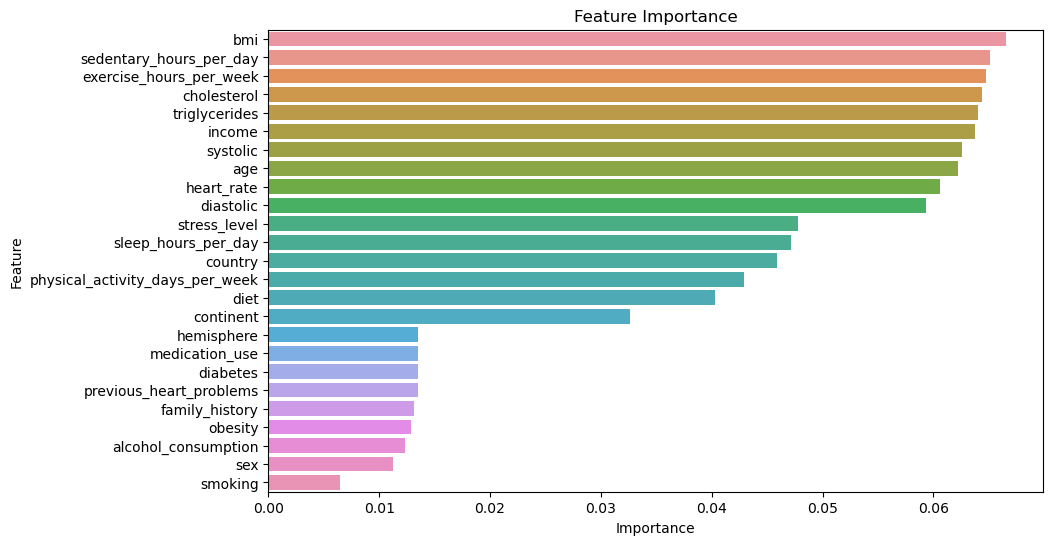

                            Feature  Importance
16                              bmi    0.066579
14          sedentary_hours_per_day    0.065072
9           exercise_hours_per_week    0.064774
2                       cholesterol    0.064353
17                    triglycerides    0.064029
15                           income    0.063726
23                         systolic    0.062562
0                               age    0.062210
3                        heart_rate    0.060579
24                        diastolic    0.059284
13                     stress_level    0.047822
19              sleep_hours_per_day    0.047120
20                          country    0.045904
18  physical_activity_days_per_week    0.042935
10                             diet    0.040260
21                        continent    0.032627
22                       hemisphere    0.013521
12                   medication_use    0.013512
4                          diabetes    0.013503
11          previous_heart_problems    0

In [22]:
# Obtaining the importance of attributes
feature_importance_rf = best_rf_model.feature_importances_

# Creating a DataFrame to visualise the importance of attributes
feature_importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Visualising the importance of attributes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Conclusion of the importance of attributes in descending order
print(feature_importance_df_rf)

Based on the feature importance analysis for the **RandomForestClassifier model**, the following conclusions can be drawn:  
1. Body Mass Index (**BMI**) continues to be a key factor among those considered, indicating the importance of the influence of body weight on health status.
2. Sedentary lifestyle (**sedentary_hours_per_day**) and physical activity (**exercise_hours_per_week**) also continue to be important factors, indicating the influence of lifestyle on overall health.  
3. Health indicators such as cholesterol (**cholesterol**), triglycerides (**triglycerides**), systolic and diastolic blood pressure (**systolic** and **diastolic**), and heart rate (**heart_rate**) all remain significant to the model.  
4. Income (**income**) and age (**age**) also have an impact on predicting health status.  
5. Factors related to psychological well-being, such as **stress_level** and **sleep_hours_per_day**, still contribute, but with less influence than other factors.  
6. Categorical attributes such as country, continent and hemisphere continue to have an influence, but it remains less significant.  
7. Medical-related factors such as medication_use, diabetes and previous heart disease (**previous_heart_problems**) also contribute, but with relatively less influence on the model.  
8. Behavioural factors such as smoking, alcohol consumption (**alcohol_consumption**), obesity and family history (**family_history**) remain the least significant among the reported attributes.  

From the obtained model, it is observed that the major factors influencing health prediction include lifestyle, heart health, general physical health and age and income factors, while behavioural and hereditary factors have less influence on health prediction.

### VotingClassifier 

In [23]:
# Combine the best models into a VotingClassifier ensemble
voting_classifier = VotingClassifier(estimators=[
    ('best_gb', best_gb_model),
    ('best_rf', best_rf_model)
], voting='soft')  # Use soft voting for probability-based predictions

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Evaluate the VotingClassifier on the test set
evaluate_model(voting_classifier, X_test, y_test, "Ensemble (VotingClassifier)")

Ensemble (VotingClassifier) Evaluation
Accuracy on Ensemble (VotingClassifier): 0.6318124207858048
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1058
           1       0.31      0.10      0.15       520

    accuracy                           0.63      1578
   macro avg       0.49      0.50      0.46      1578
weighted avg       0.55      0.63      0.56      1578

ROC AUC on Ensemble (VotingClassifier): 0.49849498327759195
Confusion Matrix:
[[947 111]
 [470  50]]


### Retraining model

Re-training of the model with better parameters and selection of parameters that have the greatest influence on the forecasting results

In [33]:
top_gb = feature_importance_df_gb["Feature"][:10]
top_rf = feature_importance_df_rf["Feature"][:10]
combined_features = set(top_gb).union(set(top_rf))
unique_combined_features = list(combined_features)
unique_combined_features

['bmi',
 'age',
 'systolic',
 'triglycerides',
 'diastolic',
 'heart_rate',
 'sleep_hours_per_day',
 'exercise_hours_per_week',
 'income',
 'sedentary_hours_per_day',
 'cholesterol']

In [25]:
# "heart_attack_risk"

In [34]:
top_features = ['bmi',
 'age',
 'systolic',
 'triglycerides',
 'diastolic',
 'heart_rate',
 'sleep_hours_per_day',
 'exercise_hours_per_week',
 'income',
 'sedentary_hours_per_day',
 'cholesterol',
 "heart_attack_risk"]
selected_features_df = df[top_features]

In [35]:
X_train_s, X_val_s, X_test_s, y_train_s, y_val_s, y_test_s = preprocess_data(selected_features_df, "heart_attack_risk")

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Train set shape: (4731, 11) (4731,)
Validation set shape: (1577, 11) (1577,)
Test set shape: (1578, 11) (1578,)


**Best Parameters**: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'learning_rate': 0.2}

In [36]:

# Create GradientBoostingClassifier and set its parameters
gb_model = GradientBoostingClassifier(random_state=1)
gb_parameters = {
    "n_estimators": [500],
    "learning_rate": [0.2],
    "max_depth": [20],
    "min_samples_split": [5],
    "min_samples_leaf": [1]
}

# Train the model to find the best parameters
best_gb_model = train_model(gb_model, X_train_s, y_train_s, gb_parameters)

# Evaluate on the validation set
evaluate_model(best_gb_model, X_val_s, y_val_s, "Validation Set")

# Retrain with errors
X_train_with_errors, y_train_with_errors = retrain_with_errors(best_gb_model, X_train_s, y_train_s, X_val_s, y_val_s)
best_gb_model.fit(X_train_with_errors, y_train_with_errors)

# Evaluate on the test set after retraining
evaluate_model(best_gb_model, X_test_s, y_test_s, "Test Set")

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Accuracy: 84.86 %
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'learning_rate': 0.2}
Validation Set Evaluation
Accuracy on Validation Set: 0.6379201014584654
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      1099
           1       0.32      0.17      0.22       478

    accuracy                           0.64      1577
   macro avg       0.51      0.51      0.49      1577
weighted avg       0.58      0.64      0.60      1577

ROC AUC on Validation Set: 0.5272632785225062
Confusion Matrix:
[[924 175]
 [396  82]]
Test Set Evaluation
Accuracy on Test Set: 0.623574144486692
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1051
           1       0.40      0.25      0.30       527

    accuracy                           0.62      1578
   macro avg       0.54      0.53      0.

**Best Parameters**: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

In [37]:
# Create RandomForestClassifier and set its parameters
rf_model = RandomForestClassifier(random_state=1)

rf_parameters = {
    "n_estimators": [500],
    "max_depth": [None],
    "min_samples_split": [5],
    "min_samples_leaf": [1],
    "max_features": ['log2']
}

# Train the RandomForest model to find the best parameters
best_rf_model = train_model(rf_model, X_train_s, y_train_s, rf_parameters)

# Evaluate on the validation set
evaluate_model(best_rf_model, X_val_s, y_val_s, "Validation Set")

# Retrain with errors for RandomForestClassifier
X_train_with_errors_rf, y_train_with_errors_rf = retrain_with_errors(best_rf_model, X_train_s, y_train_s, X_val_s, y_val_s)
best_rf_model.fit(X_train_with_errors_rf, y_train_with_errors_rf)

# Evaluate on the test set after retraining
evaluate_model(best_rf_model, X_test_s, y_test_s, "Test Set")

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Accuracy: 82.85 %
Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Validation Set Evaluation
Accuracy on Validation Set: 0.6265060240963856
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1099
           1       0.33      0.22      0.26       478

    accuracy                           0.63      1577
   macro avg       0.52      0.51      0.51      1577
weighted avg       0.59      0.63      0.60      1577

ROC AUC on Validation Set: 0.5102413376938335
Confusion Matrix:
[[883 216]
 [373 105]]
Test Set Evaluation
Accuracy on Test Set: 0.6185044359949303
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1051
           1       0.39      0.24      0.30       527

    accuracy                           0.62      1578
   macro avg       0.53      0.52   

In [38]:
# Combine the best models into a VotingClassifier ensemble
voting_classifier = VotingClassifier(estimators=[
    ('best_gb', best_gb_model),
    ('best_rf', best_rf_model)
], voting='soft')  # Use soft voting for probability-based predictions

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train_s, y_train_s)

# Evaluate the VotingClassifier on the test set
evaluate_model(voting_classifier, X_test_s, y_test_s, "Ensemble (VotingClassifier)")


Ensemble (VotingClassifier) Evaluation
Accuracy on Ensemble (VotingClassifier): 0.6330798479087453
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76      1051
           1       0.40      0.19      0.26       527

    accuracy                           0.63      1578
   macro avg       0.54      0.52      0.51      1578
weighted avg       0.58      0.63      0.59      1578

ROC AUC on Ensemble (VotingClassifier): 0.5394356508755553
Confusion Matrix:
[[897 154]
 [425 102]]


### Conclusion

The following conclusions can be drawn from the estimation results of multiple models and ensemble of models (VotingClassifier):  

1. **Gradient Boosting Classifier**:  
    - Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'learning_rate': 0.2}  
    - Accuracy on the test kit: 59.76%  
    - ROC AUC on the test kit: 0.51  
    
2. **Random Forest Classifier**:   
    - Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}  
    - Accuracy on the test kit: 61.85%  
    - ROC AUC on the test kit: 0.55  

3. **Voting Classifier**:   
    - Accuracy on the test kit: 63.31%  
    - ROC AUC on the test kit: 0.54  

Based on the presented results, **Gradient Boosting Classifier** and **Random Forest Classifier** demonstrated the best performance among all the models considered, while **Voting Classifier (ensemble)** showed comparable performance but slightly worse.

Taking the above into account, the **Gradient Boosting Classifier** model demonstrated the best accuracy among all considered models on the test dataset.

The choice of this model is justified by its better performance compared to other models on the test and validation datasets, although the results still need improvement, especially for class 1 prediction.
    
    